## Principal Component Analysis
This notebook uses Principal Component Analysis, a linear dimensional reduction of data, to observe the three possible states of an Ising Lattice: polarized up spin, polarized down spin, and unpolarized.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import random as r
from sklearn.decomposition import PCA
from sklearn import preprocessing
import os

In [2]:
# Preparing Data
data = pd.read_csv('16_25000_2800.csv') # Download a premade data set
d = data.values
t = d[:,0] # Separate a list of the temperatures, to be used for coloring in the scatter plot
d = d[:,1:] # The data set
print(t)

[0.1 0.1 0.1 ... 3.  3.  3. ]


In [3]:
# Center and Scale the Data. Avg value will be 1 and the standard dev will be 1.
scaled_data = preprocessing.scale(d)
# Notice the thing is transposed
# sklearn calculated standard dev as population, not sample

# Perform PCA
pca = PCA() # create PCA object
pca.fit(scaled_data) # Fit the PCA object to the scaled data
pca_data= pca.transform(scaled_data) # Transform the scaled data to the Principal components basis 
print(pca_data.shape)

(84000, 256)


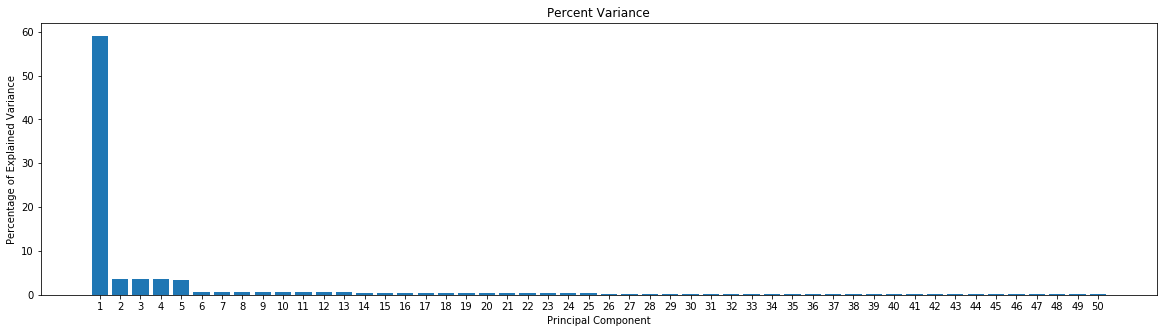

In [14]:
# Graphing Percentage of Variance for each Principal Component 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals= 2) # Calculates the percentage of variance for each PC
labels = [str(x) for x in range(1, len(per_var)+1)] # labels for each PC

# There are 256 Principal Components in all, and their percentage of variance drops off quick.
# So we'll plot the first 50 components since they go in order of descending percentage
per_var_cut = per_var[:50]
labels_cut = labels[:50]

plt.bar(x=range(1, len(per_var_cut)+1), height=per_var_cut, tick_label=labels_cut)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Percent Variance')
plt.rcParams["figure.figsize"] = [15,2]
plt.show()

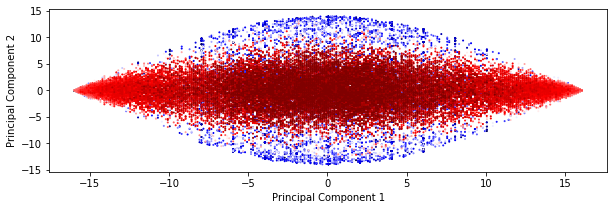

In [17]:
pcaDF = pd.DataFrame(pca_data, columns= labels)

plt.scatter(pcaDF['1'], pcaDF['2'], c=t, cmap= "seismic", s = 1)
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.rcParams["figure.figsize"] = [5,3]
plt.show()

In [35]:
# Save Data
p = os.getcwd()
pcaDF.to_csv(r''+p+'/16by16_PCA.csv', index = False, header=True)